In [2]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import geopandas as gpd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/luke/Documents/xplatform/github/rendez_vous _course/daat/headingships.csv')
df.head

<bound method NDFrame.head of         unix-timestamp       mmsi  nav_status    sog  position_accuracy  \
0       1622561332.833  244407000           0  0.000                  1   
1       1622561333.101  246657000           5 11.400                  1   
2       1622561333.337  244030516           0  4.800                  1   
3       1622561333.504  249518000           0  0.000                  0   
4       1622561333.957  244660114           0  0.000                  1   
...                ...        ...         ...    ...                ...   
129503  1622885365.448  244454000           0  5.500                  1   
129504  1622885365.736  244830366           5  4.600                  1   
129505  1622885366.459  248758000           4  8.100                  1   
129506  1622885367.102  246657000           0  0.100                  1   
129507  1622885368.006  245505000           0  0.000                  1   

          lat   lon     cog  true_heading  timestamp  
0      51.977 

In [3]:
datetime_from_unix = np.array(df['unix-timestamp']).astype('datetime64[s]')
df['utc'] = datetime_from_unix.tolist()
df.drop(columns=['unix-timestamp'])
order1 = df[['utc','mmsi', 'nav_status', 'sog','position_accuracy','lat','lon','cog','true_heading','timestamp']] 

In [4]:
# Vessels 
nr_rows = df.mmsi.count() 
nr_mmsi = df.mmsi.nunique()
cnt_mmsi = df.mmsi.value_counts()

print('Nuber of rows in df: {m}'.format(m = nr_rows))
print('Number of different vessels: {n}'.format(n=nr_mmsi))
print(cnt_mmsi)

Nuber of rows in df: 129508
Number of different vessels: 732
245209000    3120
244050469    2994
249532000    2401
248753000    2018
244697000    1956
             ... 
246218754       1
232005410       1
246392000       1
244964000       1
538007372       1
Name: mmsi, Length: 732, dtype: int64


In [5]:
# find all moorded ships
moored = df.loc[df['nav_status'] == 5]
nav_status_dict = {
0  : 'Under way using engine',
1  : 'At anchor',
2  : 'Not under command',
3  : 'Restricted manoeuverability',
4  : 'Constrained by her draught',
5  : 'Moored',
6  : 'Aground',
7  : 'Engaged in Fishing',
8  : 'Under way sailing',
9  : 'Reserved for future amendment of Navigational Status for HSC',
10 : 'Reserved for future amendment of Navigational Status for WIG',
11 : 'Reserved for future use',
12 : 'Reserved for future use',
13 : 'Reserved for future use',
14 : 'AIS-SART is active',
15 : 'Not defined (default)'}
print(nav_status_dict)

{0: 'Under way using engine', 1: 'At anchor', 2: 'Not under command', 3: 'Restricted manoeuverability', 4: 'Constrained by her draught', 5: 'Moored', 6: 'Aground', 7: 'Engaged in Fishing', 8: 'Under way sailing', 9: 'Reserved for future amendment of Navigational Status for HSC', 10: 'Reserved for future amendment of Navigational Status for WIG', 11: 'Reserved for future use', 12: 'Reserved for future use', 13: 'Reserved for future use', 14: 'AIS-SART is active', 15: 'Not defined (default)'}


In [12]:
df


,unix-timestamp,mmsi,nav_status,sog,position_accuracy,lat,lon,cog,true_heading,timestamp,utc
0,1622561332.833,244407000,0,0.000,1,51.977,4.125,180.000,208,51,2021-06-01 15:28:52
1,1622561333.101,246657000,5,11.400,1,52.031,3.968,304.000,313,52,2021-06-01 15:28:53
2,1622561333.337,244030516,0,4.800,1,51.940,4.084,115.900,110,52,2021-06-01 15:28:53
3,1622561333.504,249518000,0,0.000,0,51.960,4.010,228.400,351,54,2021-06-01 15:28:53
4,1622561333.957,244660114,0,0.000,1,51.937,4.053,73.700,69,53,2021-06-01 15:28:53
...,...,...,...,...,...,...,...,...,...,...,...
129503,1622885365.448,244454000,0,5.500,1,51.849,4.033,329.500,327,24,2021-06-05 09:29:25
129504,1622885365.736,244830366,5,4.600,1,51.960,4.045,276.500,279,25,2021-06-05 09:29:25
129505,1622885366.459,248758000,4,8.100,1,51.997,4.021,293.900,292,24,2021-06-05 09:29:26
129506,1622885367.102,246657000,0,0.100,1,51.960,4.091,198.000,78,26,2021-06-05 09:29:27


In [17]:
vsl.lat.describe()

NameError: name 'vsl' is not defined

In [13]:
df.lon.describe()

count   129508.000
mean         4.233
std          3.481
min       -177.509
25%          4.056
50%          4.125
75%          4.273
max        181.000
Name: lon, dtype: float64

In [14]:
df.nav_status.describe() # see nav_status_dict

count   129508.000
mean         1.466
std          3.176
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         15.000
Name: nav_status, dtype: float64

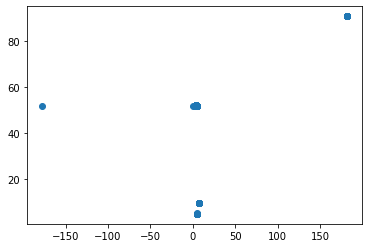

In [15]:
# matplotlib scatterplot
x = df.lon
y = df.lat
f = plt.scatter(x,y)

In [18]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat, crs="EPSG:4326"))
gdf

,unix-timestamp,mmsi,nav_status,sog,position_accuracy,lat,lon,cog,true_heading,timestamp,utc,geometry
0,1622561332.833,244407000,0,0.000,1,51.977,4.125,180.000,208,51,2021-06-01 15:28:52,POINT (4.12550 51.97666)
1,1622561333.101,246657000,5,11.400,1,52.031,3.968,304.000,313,52,2021-06-01 15:28:53,POINT (3.96795 52.03108)
2,1622561333.337,244030516,0,4.800,1,51.940,4.084,115.900,110,52,2021-06-01 15:28:53,POINT (4.08383 51.93998)
3,1622561333.504,249518000,0,0.000,0,51.960,4.010,228.400,351,54,2021-06-01 15:28:53,POINT (4.00996 51.95992)
4,1622561333.957,244660114,0,0.000,1,51.937,4.053,73.700,69,53,2021-06-01 15:28:53,POINT (4.05263 51.93709)
...,...,...,...,...,...,...,...,...,...,...,...,...
129503,1622885365.448,244454000,0,5.500,1,51.849,4.033,329.500,327,24,2021-06-05 09:29:25,POINT (4.03294 51.84938)
129504,1622885365.736,244830366,5,4.600,1,51.960,4.045,276.500,279,25,2021-06-05 09:29:25,POINT (4.04506 51.96038)
129505,1622885366.459,248758000,4,8.100,1,51.997,4.021,293.900,292,24,2021-06-05 09:29:26,POINT (4.02092 51.99668)
129506,1622885367.102,246657000,0,0.100,1,51.960,4.091,198.000,78,26,2021-06-05 09:29:27,POINT (4.09060 51.96032)


In [20]:
from ipyleaflet import Map, TileLayer, basemaps, GeoJSON, GeoData, FullScreenControl

center = [51.95, 4.03]
zoom = 12


gdf = gpd.GeoDataFrame(df.mmsi, geometry=gpd.points_from_xy(df.lon, df.lat, crs="EPSG:4326"))

geo_data = GeoData(geo_dataframe = gdf,
    style={'color': 'black', 'radius':8, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')

m = Map(center=center, zoom=zoom, interpolation='nearest', basemap=basemaps.CartoDB.Positron)
m.add_layer(geo_data)
m.add_control(FullScreenControl())

m

Map(center=[51.95, 4.03], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [12]:
gdf

,Conc,Longitude,Latitude,geometry
0,15.756,7.430,46.910,POINT (7.42978 46.90956)
1,17.979,7.430,46.910,POINT (7.42958 46.91011)
2,16.053,7.430,46.909,POINT (7.42977 46.90928)
3,17.228,7.430,46.909,POINT (7.42990 46.90926)
4,18.003,7.430,46.910,POINT (7.42985 46.91005)
5,18.081,7.430,46.911,POINT (7.42961 46.91083)
6,16.804,7.431,46.910,POINT (7.43059 46.91032)
7,16.431,7.430,46.910,POINT (7.42967 46.91017)
8,15.982,7.430,46.910,POINT (7.43021 46.90975)
9,17.075,7.430,46.910,POINT (7.43021 46.90968)


In [11]:
from ipyleaflet import Map, TileLayer, basemaps, FullScreenControl
from ipyleaflet.velocity import Velocity
import xarray as xr
import os

if not os.path.exists('wind-global.nc'):
  url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
  import requests
  r = requests.get(url)
  wind_data = r.content
  with open('wind-global.nc', 'wb') as f:
      f.write(wind_data)

center = [52, 4.2]
zoom = 10
m = Map(center=center, zoom=zoom, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)

ds = xr.open_dataset('wind-global.nc')
display_options = {
    'velocityType': 'Global Wind',
    'displayPosition': 'bottomleft',
    'displayEmptyString': 'No wind data'
}
wind = Velocity(data=ds,
                zonal_speed='u_wind',
                meridional_speed='v_wind',
                latitude_dimension='lat',
                longitude_dimension='lon',
                velocity_scale=0.01,
                max_velocity=20,
                display_options=display_options)
m.add_layer(wind)
m.add_control(FullScreenControl())

m

Map(center=[52, 4.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [9]:
from ipyleaflet import Map, GeoJSON, GeoData
import geopandas, pandas as pd, numpy as np

m = Map(center=(46.91, 7.43), zoom=15)

numpoints = 10
center = (7.43, 46.91)

df = pd.DataFrame(
    {'Conc': 1 * np.random.randn(numpoints) + 17,
     'Longitude': 0.0004 * np.random.randn(numpoints) + center[0],
     'Latitude': 0.0004 * np.random.randn(numpoints) + center[1]})

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

geo_data = GeoData(geo_dataframe = gdf,
    style={'color': 'black', 'radius':8, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')

m.add_layer(geo_data)
m

Map(center=[46.91, 7.43], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

<Figure size 432x288 with 0 Axes>

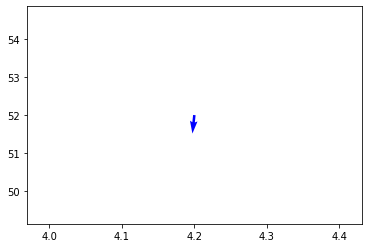

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
HND = 
COG = 186
lon = 4.2
lat =52


U = np.ones_like(1)
V = np.ones_like(1)

#Add boat orientation compensation for matplotlib
phi = 360-COG + 90  #Matplotlib is counter clockwise and 90 deg off

# Render Plot
fig, ax = plt.subplots();
ax.quiver(lon ,lat, U, V, angles=phi, color='b')

#ax.set_xlim([4.260799, 4.5445917] ) #insert your own boundry 
#ax.set_ylim([51.857854 , 51.923438])
plt.figure()